In [248]:
import pandas as pd
data=pd.read_csv('Financial_inclusion_dataset.csv')


In [249]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [250]:
data.shape

(23524, 13)

In [251]:
data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [252]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [253]:
data.duplicated().sum()

np.int64(0)

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

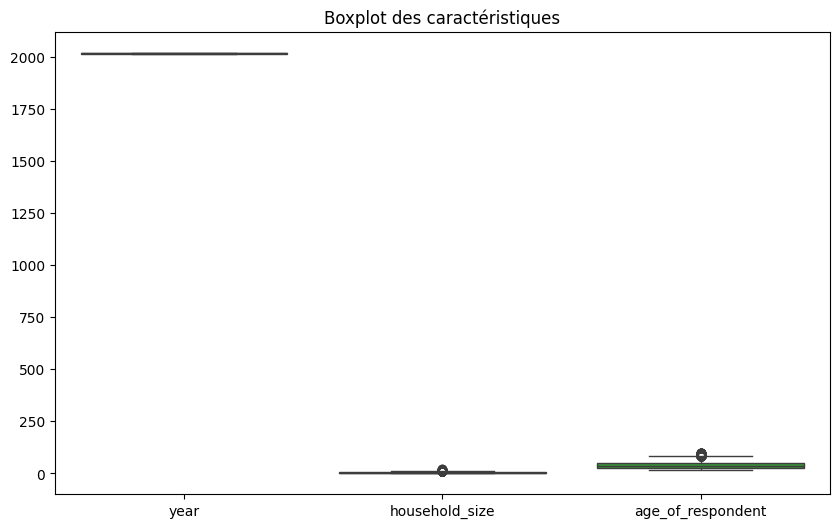

In [255]:
# Visualisation des outliers avec des boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Boxplot des caractéristiques")
plt.show()

In [256]:
# librairies pour l'encodage categoriel
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [257]:
data['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [258]:
from sklearn.preprocessing import LabelEncoder

# Encodage par étiquetage
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['country'])

In [259]:
data['Country'].value_counts()
# Rwanda=1, Tanzania=2,Kenya =0, Uganda =3

Country
1    8735
2    6620
0    6068
3    2101
Name: count, dtype: int64

In [260]:
data['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [261]:
# Encodage binaire
data['Bank_account'] = data['bank_account'].map({'No': 0, 'Yes': 1})

In [262]:
data['location_type'].value_counts() 

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [263]:
# Encodage binaire
data['Location_type'] = data['location_type'].map({'Rural': 0, 'Urban': 1})

In [264]:
data['cellphone_access'].value_counts() 

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [265]:
# Encodage binaire
data['Cellphone_access'] = data['cellphone_access'].map({'No': 0, 'Yes': 1})

In [266]:
data['relationship_with_head'].value_counts() 

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [267]:
label_encoder = LabelEncoder()
data['Relationship_with_head'] = label_encoder.fit_transform(data['relationship_with_head'])

In [268]:
data['Relationship_with_head'].value_counts()
# Head of Household=1, Spouse=5, Child=0, Parent=4, Other relative=3, Other non-relatives =2

Relationship_with_head
1    12831
5     6520
0     2229
4     1086
3      668
2      190
Name: count, dtype: int64

In [269]:
data['marital_status'].value_counts() 

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [270]:
label_encoder = LabelEncoder()
data['Marital_status'] = label_encoder.fit_transform(data['marital_status'])

In [271]:
data['Marital_status'].value_counts()
# Married/Living together= 2, Single/Never Married =3, Widowed =4, Divorced/Seperated=0, Dont know =1

Marital_status
2    10749
3     7983
4     2708
0     2076
1        8
Name: count, dtype: int64

In [272]:
data['education_level'].value_counts() 

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [273]:
label_encoder = LabelEncoder()
data['Education_level'] = label_encoder.fit_transform(data['education_level'])
# Primary education=2, No formal education=0, Secondary education=3, Tertiary education=4, Vocational/Specialised training=5, 
# Other/Dont know/RTA  =1

In [274]:
data['Education_level'].value_counts()

Education_level
2    12791
0     4515
3     4223
4     1157
5      803
1       35
Name: count, dtype: int64

In [275]:
data['job_type'].value_counts() 

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [276]:
data['job_type']=data['job_type'].replace({'Dont Know/Refuse to answer':'Other Income' })
data['job_type']=data['job_type'].replace({'Formally employed Government':'Government Dependent' })

In [277]:
data['job_type'].value_counts() 

job_type
Self employed                6437
Informally employed          5597
Farming and Fishing          5441
Remittance Dependent         2527
Other Income                 1206
Formally employed Private    1055
Government Dependent          634
No Income                     627
Name: count, dtype: int64

In [278]:
data['Job_type'] = label_encoder.fit_transform(data['job_type'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Farming and Fishing': np.int64(0), 'Formally employed Private': np.int64(1), 'Government Dependent': np.int64(2), 'Informally employed': np.int64(3), 'No Income': np.int64(4), 'Other Income': np.int64(5), 'Remittance Dependent': np.int64(6), 'Self employed': np.int64(7)}


In [279]:
data['gender_of_respondent']=data['gender_of_respondent'].replace({'Female':0, 'Male':1})

C:\Users\houss\AppData\Local\Temp\ipykernel_23156\85905153.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender_of_respondent']=data['gender_of_respondent'].replace({'Female':0, 'Male':1})


In [280]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'Country', 'Bank_account',
       'Location_type', 'Cellphone_access', 'Relationship_with_head',
       'Marital_status', 'Education_level', 'Job_type'],
      dtype='object')

In [281]:
data.drop(columns=['uniqueid','bank_account','location_type','cellphone_access','relationship_with_head',
                 'marital_status','education_level', 'job_type' ],inplace=True)

In [282]:
data.drop(columns=['country'])

,year,household_size,age_of_respondent,gender_of_respondent,Country,Bank_account,Location_type,Cellphone_access,Relationship_with_head,Marital_status,Education_level,Job_type
0,2018,3,24,0,0,1,0,1,5,2,3,7
1,2018,5,70,0,0,0,0,0,1,4,0,2
2,2018,5,26,1,0,1,1,1,3,3,5,7
3,2018,5,34,0,0,0,0,1,1,2,2,1
4,2018,8,26,1,0,0,1,0,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,4,48,0,3,0,0,1,1,0,0,5
23520,2018,2,27,0,3,0,0,1,1,3,3,5
23521,2018,5,27,0,3,0,0,1,4,4,2,5
23522,2018,7,30,0,3,0,1,1,4,0,3,7


In [283]:
data.columns

Index(['country', 'year', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'Country', 'Bank_account', 'Location_type',
       'Cellphone_access', 'Relationship_with_head', 'Marital_status',
       'Education_level', 'Job_type'],
      dtype='object')

In [284]:
# handling outliers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


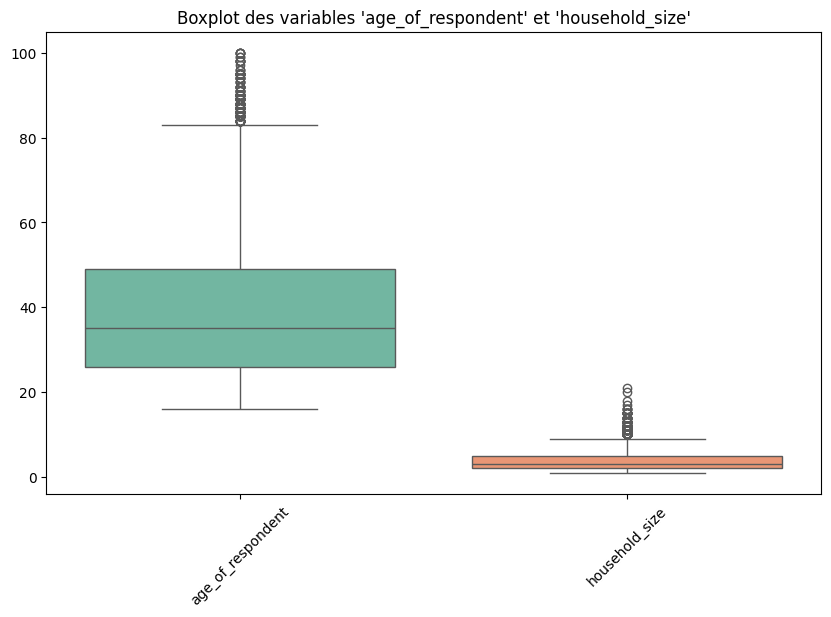

In [285]:
# Définir les variables à tracer
variables = ['age_of_respondent', 'household_size']

# Tracer les boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[variables], palette="Set2")

# Ajouter un titre et améliorer la lisibilité
plt.title("Boxplot des variables 'age_of_respondent' et 'household_size'")
plt.xticks(rotation=45)  # Rotation des labels si nécessaire
plt.show()

In [286]:
# Fonction pour détecter et supprimer les outliers selon l'IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 1er quartile (25%)
    Q3 = data[column].quantile(0.75)  # 3e quartile (75%)
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Appliquer sur une colonne spécifique (ex: "age")
data_cleaned = remove_outliers_iqr(data, 'age_of_respondent')

In [287]:
data_cleaned = remove_outliers_iqr(data, 'household_size')

In [295]:
data_cleaned 

,country,year,household_size,age_of_respondent,gender_of_respondent,Country,Bank_account,Location_type,Cellphone_access,Relationship_with_head,Marital_status,Education_level,Job_type
0,Kenya,2018,3,24,0,0,1,0,1,5,2,3,7
1,Kenya,2018,5,70,0,0,0,0,0,1,4,0,2
2,Kenya,2018,5,26,1,0,1,1,1,3,3,5,7
3,Kenya,2018,5,34,0,0,0,0,1,1,2,2,1
4,Kenya,2018,8,26,1,0,0,1,0,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,9,20,0,3,0,0,1,0,3,2,4
23519,Uganda,2018,4,48,0,3,0,0,1,1,0,0,5
23520,Uganda,2018,2,27,0,3,0,0,1,1,3,3,5
23521,Uganda,2018,5,27,0,3,0,0,1,4,4,2,5


In [296]:
data_cleaned.drop(columns=['country'], inplace=True)

C:\Users\houss\AppData\Local\Temp\ipykernel_23156\2372271154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['country'], inplace=True)


In [297]:
data_cleaned.describe()

,year,household_size,age_of_respondent,gender_of_respondent,Country,Bank_account,Location_type,Cellphone_access,Relationship_with_head,Marital_status,Education_level,Job_type
count,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000,23143.000000
mean,2016.967636,3.676576,38.872488,0.409886,1.195567,0.141166,0.393078,0.742471,2.213628,2.393337,1.993691,3.725965
std,0.844662,2.024568,16.536777,0.491823,0.916222,0.348200,0.488444,0.437283,1.891192,1.002599,1.205364,2.705331
min,2016.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,2017.000000,3.000000,35.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
75%,2018.000000,5.000000,49.000000,1.000000,2.000000,0.000000,1.000000,1.000000,5.000000,3.000000,3.000000,7.000000
max,2018.000000,9.000000,100.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,7.000000


some data visualisation:

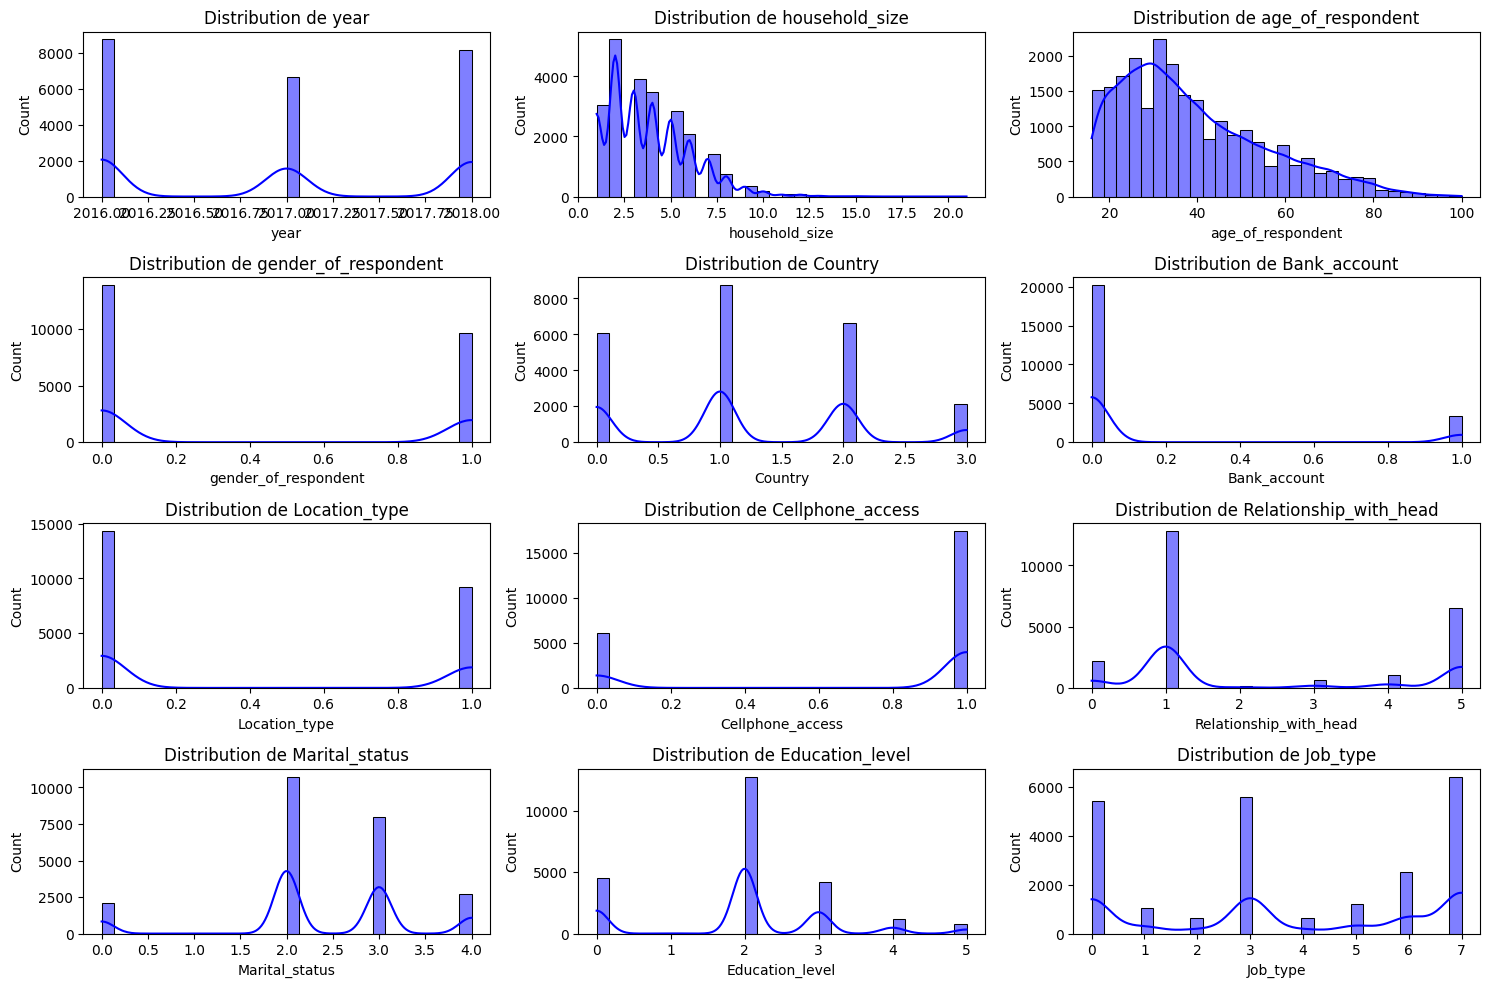

In [298]:
numeric_columns = data_cleaned.select_dtypes(include=['number']).columns

# Définir la taille de la figure
plt.figure(figsize=(15, 12))

# Tracer un histogramme pour chaque variable
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Grille de subplots (3 colonnes)
    sns.histplot(data[col], kde=True, bins=30, color="blue")  # Histogramme + courbe de densité
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()

Description des distribution des varibles de la base de donnee :

Year 
La distribution montre des pics distincts à différentes années.
Cela indique que les données ont été collectées à des intervalles précis plutôt qu'en continu.

Household Size 
La distribution est asymétrique à droite.
La plupart des ménages comptent entre 1 et 10 personnes, avec un pic autour de 2-4.
Quelques valeurs extrêmes (outliers) existent pour les ménages très grands.

Age of Respondent 
La distribution est asymétrique à droite.
La majorité des répondants ont entre 20 et 50 ans, avec un pic autour de 30 ans.
Très peu de répondants ont plus de 70 ans.

Country  Rwanda=1, Tanzania=2,Kenya =0, Uganda =3
Plusieurs pics distincts indiquent que les données viennent de plusieurs pays.
la plus part des repodants sont du Rwanda, puis kenya et tenzanie et en dernier l'Uganda

Bank Account 
Variable binaire (0 = Pas de compte, 1 = A un compte).
La grande majorité n'a pas de compte bancaire, ce qui indique un fort déséquilibre dans les données.

 Gender of Respondent (Genre du répondant)
Variable binaire (1= Homme, 0 = Femme).
Une forte proportion de répondantes féminines, ce qui suggère un biais dans l’échantillonnage.
 
 Location Type ('Rural': 0, 'Urban': 1)
.
On observe une proportion plus élevée de répondants en zone rurale.

 Cellphone Access (0 = Pas d'accès, 1 = A un accès)
Variable binaire 
La majorité des répondants ont un téléphone mobile.

 Relationship with Head (Head of Household=1, Spouse=5, Child=0, Parent=4, Other relative=3, Other non-relatives =2)
Plusieurs catégories distinctes 
La distribution montre que la majorité des répondants sont soit chefs de ménage soit conjoints.

 Marital Status (Married/Living together= 2, Single/Never Married =3, Widowed =4, Divorced/Seperated=0, Dont know =1)
Plusieurs catégories distinctes.
Les pics suggèrent que la plupart des répondants sont soit mariés soit célibataires.
 
  Education Level (Primary education=2, No formal education=0, Secondary education=3, Tertiary education=4, Vocational/Specialised training=5)

Plusieurs catégories 
Un grand nombre de répondants ont un niveau d'éducation primaire ou secondaire.
Très peu ont une éducation universitaire.

 Job Type ('Farming and Fishing': (0), 'Formally employed Private': (1), 'Government Dependent': (2), 'Informally employed': (3), 'No Income': (4), 'Other Income': (5), 'Remittance Dependent': (6), 'Self employed': (7))
La distribution montre une forte proportion de travailleurs indépendants et informels.
Très peu de répondants sont fonctionnaires ou employés du secteur privé.


Observations Générales :

Déséquilibre des classes dans certaines variables (Bank Account, Gender, Location Type).
Présence d'outliers dans Household Size et Age.
Certaines distributions sont asymétriques, notamment Household Size et Age.
 Les variables catégorielles encodées montrent des pics nets, indiquant des catégories bien définies.

Profilage: la majorite des repondant sont des femmes agees en moyenne de 30, issue du Rwanda, ont un niveau d'nstruction primaire sont celibatare ou mariees elle sont epouse ou chef de menage,  ont un telephone mobile ,vivent en zone rural, travail dans l'agriculture et la peche ou sont independante ou dans l'informel. pour leur majorite elle n'ont pas de compte bancaire.



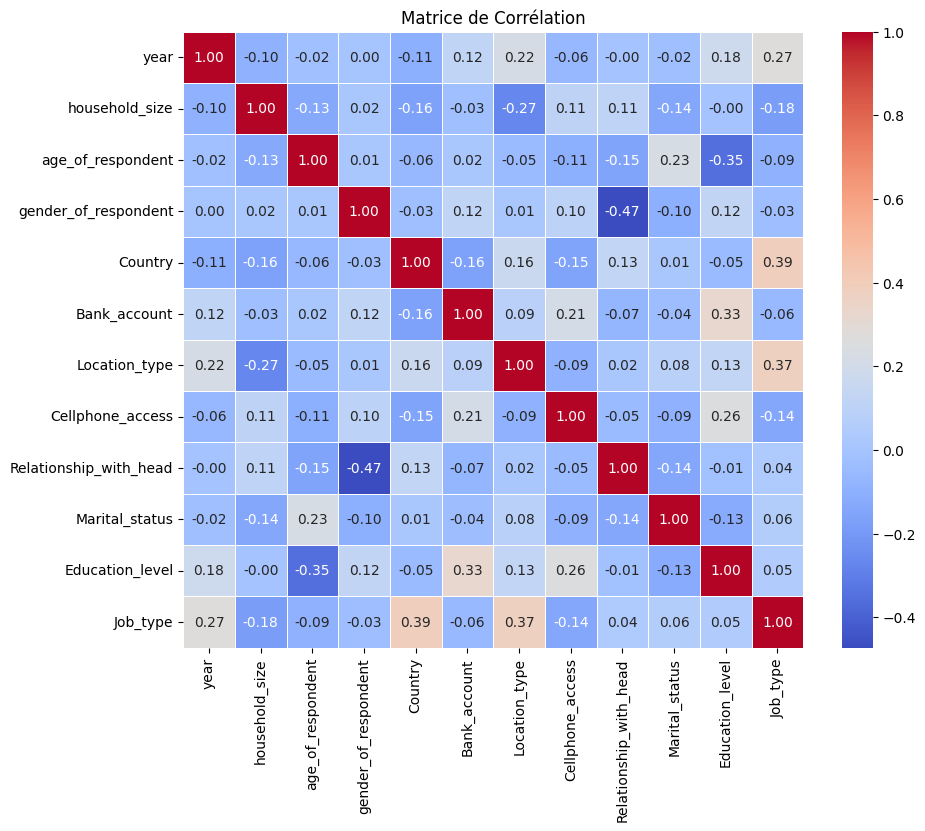

In [299]:
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))  # Ajuster la taille du graphique
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [ ]:
Absence de correaltion significative ou parlante !!!

Préparer les données a l'initialisation d'un modele ML classifier :

In [301]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Charger les données
X = data_cleaned.drop(columns=['Bank_account'])  
y = data_cleaned['Bank_account']

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Initialisation des modèles de classification:

In [302]:
# Régression Logistique
logistic_model = LogisticRegression()

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Multi-Layer Perceptron (Réseau de Neurones)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

Entrainement des modele:

In [303]:
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

C:\Users\houss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MLPClassifier(max_iter=300, random_state=42)

In [304]:
from sklearn.metrics import accuracy_score

# Prédictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_mlp = mlp_model.predict(X_test)

# Scores d'accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

Logistic Regression Accuracy: 0.8664938431626701
Random Forest Accuracy: 0.8587167854828257
XGBoost Accuracy: 0.8809678116223807
MLP Classifier Accuracy: 0.8740548714625189


Ajustement des Hyperparamètres et estimation des modeles:

In [305]:
from sklearn.model_selection import GridSearchCV

# Exemple de recherche par grille pour un modèle de forêt aléatoire
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [306]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [307]:
import joblib
# Sauvegarde des modèles
joblib.dump(logistic_model, 'logistic_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')

['mlp_model.pkl']

In [308]:
logistic_model_loaded = joblib.load('logistic_model.pkl')
rf_model_loaded = joblib.load('rf_model.pkl')
xgb_model_loaded = joblib.load('xgb_model.pkl')
mlp_model_loaded = joblib.load('mlp_model.pkl')

In [309]:
y_pred_test = rf_model_loaded.predict(X_test)
print("Prédictions Random Forest (test) :", y_pred_test[:10])

Prédictions Random Forest (test) : [0 0 0 0 0 0 0 0 0 1]
